#                              CIA Factbook Data Analysis and Visualization

## By-Tanish Gupta

<img align="left" width="500" height="400" src="https://drive.google.com/uc?export=view&id=1RA9e2_Who0zzGQg4tHDhkxCUMkGZQs6r">

# Introduction.

### In this project, we will be doing an Exploratory Data Analysis(EDA) and GDP per capita prediction of different countries of the world through machine learning techniques on the CIA Factbook country dataset which is taken from www.cia.gov .

## Overview of Notebook

### 1. Load and Manipulate Data
### 2. Data Preparation for the Model fitting
### 3. Exploratory Data Analysis¶
### 4. Feature Engineering for the baseline model
### 5. Model fitting and selection
### 6. Finding similarity between different countries.¶
### 7. Conclusion.

# 1. Load and Manipulate Data

In [3]:
# importing required libraries*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools 
import numpy.ma as ma
from scipy.stats import pearsonr,spearmanr
from sklearn.impute import SimpleImputer 
from scipy.stats import kstest 
from sklearn.preprocessing import scale

In [4]:
# reading data into dataframe
df=pd.read_csv('Country_data.csv')
df.head()

,Country Name,Country Name.1,Country Code,Government Type,Capital City,Date of Founding/Independence,Latitude of Capital,Longitude of Capital,Telephones - fixed lines,Telephones - mobile cellular,...,Life expectancy at birth,Total fertility rate,Obesity - adult prevalence rate,Children under the age of 5 years underweight,Education expenditures,"Unemployment, youth ages 15-24",Airports,Railways,Roadways,Merchant marine
0,Afghanistan,Afghanistan,AF,Islamic republic,Kabul,8/19/1919,34 31 N,69 11 E,"118,769","23,929,713",...,52.1,5.02,5.5,25,4.1,17.6,43,unknown,"34,903",unknown
1,Albania,Albania,AL,parliamentary democracy,Tirana,11/28/1912,41 19 N,19 49 E,"247,010","3,497,950",...,78.6,1.52,21.7,1.5,4,31.9,4,677,"3,945",60
2,Algeria,Algeria,DZ,republic,Algiers,7/5/1962,36 45 N,3 03 E,"3,130,090","49,873,389",...,77.2,2.66,27.4,3,unknown,25.7,157,"3,973","104,000",106
3,Andorra,Andorra,AD,parliamentary democracy,Andorra la Vella,1278,42 30 N,1 31 E,"38,411","80,337",...,82.9,1.41,25.6,unknown,3.2,unknown,unknown,unknown,320,unknown
4,Angola,Angola,AO,republic,Luanda,11/11/1975,8 50 S,13 13 E,"161,070","13,323,952",...,60.6,6.09,8.2,19,3.4,39.4,176,"2,852","26,000",55


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 80 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Country Name                                         197 non-null    object
 1   Country Name.1                                       197 non-null    object
 2   Country Code                                         197 non-null    object
 3   Government Type                                      197 non-null    object
 4   Capital City                                         197 non-null    object
 5   Date of Founding/Independence                        197 non-null    object
 6   Latitude of Capital                                  197 non-null    object
 7   Longitude of Capital                                 197 non-null    object
 8   Telephones - fixed lines                             197 non-null    object
 9  

### We have found that all the columns are of Dtype 'object'.So we will have to convert the numeric ones to Dtype float or int.

In [6]:
df.describe()

,Country Name,Country Name.1,Country Code,Government Type,Capital City,Date of Founding/Independence,Latitude of Capital,Longitude of Capital,Telephones - fixed lines,Telephones - mobile cellular,...,Life expectancy at birth,Total fertility rate,Obesity - adult prevalence rate,Children under the age of 5 years underweight,Education expenditures,"Unemployment, youth ages 15-24",Airports,Railways,Roadways,Merchant marine
count,197,197,197,197,197,197,197,197,197,197,...,197,197,197,197,197,197,197,197,197,197
unique,197,197,197,52,197,187,195,197,191,195,...,128,137,141,102,63,131,118,131,181,126
top,Costa Rica,Costa Rica,BI,republic,Maseru,9/15/1821,41 19 N,61 31 W,unknown,unknown,...,71.3,1.87,unknown,unknown,unknown,unknown,6,unknown,unknown,unknown
freq,1,1,1,75,1,5,2,1,4,3,...,5,4,9,74,36,31,8,65,16,36


### The describe method gives us the info that there are 75 countries out of 197 countries which have 'republic' type of government.Also 5 countries were founded/got independence on date '9/15/1821'.It can be also seen that there are many 'unknowns' in many columns so we have to fill them with proper value.

In [7]:
num_col=['GDP - per capita (PPP)','GDP - real growth rate','Gross national saving', 'Industrial production growth rate','Unemployment rate',
       'Distribution of family income - Gini index',
       'Taxes and other revenues', 'Budget surplus (+) or deficit (-)',
       'Public debt', 'Inflation rate (consumer prices)','Telephones - fixed lines',
       'Telephones - mobile cellular', 'Internet users',
       'Broadband - fixed subscriptions', 'GDP (purchasing power parity)','Labor force','Stock of narrow money', 'Stock of broad money',
       'Stock of domestic credit', 'Market value of publicly traded shares',
       'Current account balance', 'Exports', 'Imports',
       'Reserves of foreign exchange and gold', 'Debt - external',
       'Stock of direct foreign investment - at home',
       'Stock of direct foreign investment - abroad',
       'Electricity - production', 'Electricity - consumption',
       'Electricity - exports', 'Electricity - imports',
       'Electricity - installed generating capacity','Crude oil - production','Crude oil - exports', 'Crude oil - imports',
       'Crude oil - proved reserves',
       'Refined petroleum products - production',
       'Refined petroleum products - consumption',
       'Refined petroleum products - exports',
       'Refined petroleum products - imports', 'Natural gas - production',
       'Natural gas - consumption', 'Natural gas - exports',
       'Natural gas - imports', 'Natural gas - proved reserves',
       'Carbon dioxide emissions from consumption of energy', 'Area','Population','Airports',
       'Railways', 'Roadways','Military expenditures', 'Median age',
       'Population growth rate', 'Birth rate', 'Death rate',
       'Net migration rate', 'Maternal mortality rate',
       'Infant mortality rate', 'Life expectancy at birth',
       'Total fertility rate', 'Education expenditures','Children under the age of 5 years underweight',
        'Obesity - adult prevalence rate','Unemployment, youth ages 15-24' ,'Merchant marine']
len(num_col)

66

### Above we have created a list of all the numeric columns that need to be converted to float datatype for further analysis.I have selected 66 of the useful ones.

In [8]:
#Converting these columns to numeric but before that removing the unwanted symbols,characters.
df=df.replace('unknown',np.nan)
for i in num_col:
    df[i]=df[i].str.replace(',','')
    df[i]=df[i].str.replace('$','')
    df[i]=df[i].str.replace('(','')
    df[i]=df[i].str.replace(')','')
    df[i]=pd.to_numeric(df[i],errors='raise')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 80 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Country Name                                         197 non-null    object 
 1   Country Name.1                                       197 non-null    object 
 2   Country Code                                         196 non-null    object 
 3   Government Type                                      197 non-null    object 
 4   Capital City                                         197 non-null    object 
 5   Date of Founding/Independence                        195 non-null    object 
 6   Latitude of Capital                                  196 non-null    object 
 7   Longitude of Capital                                 196 non-null    object 
 8   Telephones - fixed lines                             193 non-null    f

In [10]:
df.head()

,Country Name,Country Name.1,Country Code,Government Type,Capital City,Date of Founding/Independence,Latitude of Capital,Longitude of Capital,Telephones - fixed lines,Telephones - mobile cellular,...,Life expectancy at birth,Total fertility rate,Obesity - adult prevalence rate,Children under the age of 5 years underweight,Education expenditures,"Unemployment, youth ages 15-24",Airports,Railways,Roadways,Merchant marine
0,Afghanistan,Afghanistan,AF,Islamic republic,Kabul,8/19/1919,34 31 N,69 11 E,118769.0,23929713.0,...,52.1,5.02,5.5,25.0,4.1,17.6,43.0,NaN,34903.0,NaN
1,Albania,Albania,AL,parliamentary democracy,Tirana,11/28/1912,41 19 N,19 49 E,247010.0,3497950.0,...,78.6,1.52,21.7,1.5,4.0,31.9,4.0,677.0,3945.0,60.0
2,Algeria,Algeria,DZ,republic,Algiers,7/5/1962,36 45 N,3 03 E,3130090.0,49873389.0,...,77.2,2.66,27.4,3.0,NaN,25.7,157.0,3973.0,104000.0,106.0
3,Andorra,Andorra,AD,parliamentary democracy,Andorra la Vella,1278,42 30 N,1 31 E,38411.0,80337.0,...,82.9,1.41,25.6,NaN,3.2,NaN,NaN,NaN,320.0,NaN
4,Angola,Angola,AO,republic,Luanda,11/11/1975,8 50 S,13 13 E,161070.0,13323952.0,...,60.6,6.09,8.2,19.0,3.4,39.4,176.0,2852.0,26000.0,55.0


## We can see that we have a lot of NaN values in our dataframe,so filling them by median values of that particular column.

In [11]:
df1=df
for i in num_col:
    df1[i]=df[i].fillna(df[i].median())

In [12]:
df1.head()

,Country Name,Country Name.1,Country Code,Government Type,Capital City,Date of Founding/Independence,Latitude of Capital,Longitude of Capital,Telephones - fixed lines,Telephones - mobile cellular,...,Life expectancy at birth,Total fertility rate,Obesity - adult prevalence rate,Children under the age of 5 years underweight,Education expenditures,"Unemployment, youth ages 15-24",Airports,Railways,Roadways,Merchant marine
0,Afghanistan,Afghanistan,AF,Islamic republic,Kabul,8/19/1919,34 31 N,69 11 E,118769.0,23929713.0,...,52.1,5.02,5.5,25.0,4.1,17.6,43.0,2504.0,34903.0,100.0
1,Albania,Albania,AL,parliamentary democracy,Tirana,11/28/1912,41 19 N,19 49 E,247010.0,3497950.0,...,78.6,1.52,21.7,1.5,4.0,31.9,4.0,677.0,3945.0,60.0
2,Algeria,Algeria,DZ,republic,Algiers,7/5/1962,36 45 N,3 03 E,3130090.0,49873389.0,...,77.2,2.66,27.4,3.0,4.3,25.7,157.0,3973.0,104000.0,106.0
3,Andorra,Andorra,AD,parliamentary democracy,Andorra la Vella,1278,42 30 N,1 31 E,38411.0,80337.0,...,82.9,1.41,25.6,10.2,3.2,14.8,44.0,2504.0,320.0,100.0
4,Angola,Angola,AO,republic,Luanda,11/11/1975,8 50 S,13 13 E,161070.0,13323952.0,...,60.6,6.09,8.2,19.0,3.4,39.4,176.0,2852.0,26000.0,55.0


# We can check the min,max,mean,median values of our dataframe using describe method.

In [13]:
df1.describe()

,Telephones - fixed lines,Telephones - mobile cellular,Internet users,Broadband - fixed subscriptions,GDP (purchasing power parity),GDP - real growth rate,GDP - per capita (PPP),Gross national saving,Industrial production growth rate,Labor force,...,Life expectancy at birth,Total fertility rate,Obesity - adult prevalence rate,Children under the age of 5 years underweight,Education expenditures,"Unemployment, youth ages 15-24",Airports,Railways,Roadways,Merchant marine
count,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,197.000000,197.000000,197.000000,197.000000,1.970000e+02,...,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,1.970000e+02,197.000000
mean,4.942686e+06,3.965912e+07,1.716647e+07,5.071876e+06,6.547315e+11,3.122081,20956.091371,20.959137,3.385025,1.742236e+07,...,72.515736,2.588071,19.561675,11.648223,4.484264,17.120305,211.558376,7486.522843,1.944551e+05,466.903553
std,1.798735e+07,1.425296e+08,6.289196e+07,2.849723e+07,2.456477e+12,5.978764,23497.850281,10.199607,6.380440,7.032355e+07,...,7.607616,1.235958,10.760126,8.169053,1.664242,10.713085,1022.033409,24937.186222,7.028819e+05,1135.229171
min,0.000000e+00,7.600000e+03,5.042000e+03,7.600000e+01,4.200000e+07,-36.500000,700.000000,-21.900000,-26.100000,3.615000e+03,...,52.100000,0.840000,2.100000,0.500000,1.000000,0.500000,1.000000,9.000000,8.000000e+00,1.000000
25%,6.497000e+04,2.030637e+06,5.742360e+05,2.883300e+04,1.960000e+10,1.800000,4000.000000,15.300000,1.200000,8.316000e+05,...,67.200000,1.740000,9.600000,7.000000,3.600000,10.100000,15.000000,1363.000000,7.762000e+03,42.000000
50%,4.131000e+05,7.976190e+06,2.700726e+06,2.866980e+05,6.893000e+10,3.050000,12750.000000,20.550000,3.150000,3.657000e+06,...,74.300000,2.070000,20.550000,10.200000,4.300000,14.800000,44.000000,2504.000000,3.490300e+04,100.000000
75%,2.726193e+06,2.426546e+07,9.041427e+06,1.848167e+06,3.395000e+11,4.800000,29300.000000,25.800000,5.400000,1.182000e+07,...,77.500000,2.990000,25.000000,13.200000,5.200000,22.300000,114.000000,3960.000000,9.618900e+04,313.000000
max,1.937620e+08,1.474097e+09,7.307240e+08,3.785400e+08,2.536000e+13,64.000000,139100.000000,50.200000,60.300000,8.067000e+08,...,89.400000,6.350000,61.000000,39.900000,12.800000,53.400000,13513.000000,293564.000000,6.586610e+06,9053.000000


# 2. Data Preparation for the Model fitting

In [14]:
## Creating a list of features for our machine learning model.

features=['GDP - real growth rate','Gross national saving', 'Industrial production growth rate','Unemployment rate',
       'Distribution of family income - Gini index',
       'Taxes and other revenues', 'Budget surplus (+) or deficit (-)',
           'Public debt', 'Inflation rate (consumer prices)','Telephones - fixed lines',
       'Telephones - mobile cellular', 'Internet users',
       'Broadband - fixed subscriptions', 'GDP (purchasing power parity)','Labor force','Stock of narrow money', 'Stock of broad money',
       'Stock of domestic credit', 'Market value of publicly traded shares',
       'Current account balance', 'Exports', 'Imports',
       'Reserves of foreign exchange and gold', 'Debt - external',
       'Stock of direct foreign investment - at home',
       'Stock of direct foreign investment - abroad',
       'Electricity - production', 'Electricity - consumption',
       'Electricity - exports', 'Electricity - imports',
       'Electricity - installed generating capacity','Crude oil - production','Crude oil - exports', 'Crude oil - imports',
       'Crude oil - proved reserves',
       'Refined petroleum products - production',
       'Refined petroleum products - consumption',
       'Refined petroleum products - exports',
       'Refined petroleum products - imports', 'Natural gas - production',
       'Natural gas - consumption', 'Natural gas - exports',
       'Natural gas - imports', 'Natural gas - proved reserves',
       'Carbon dioxide emissions from consumption of energy', 'Area','Population','Airports',
       'Railways', 'Roadways','Military expenditures', 'Median age',
       'Population growth rate', 'Birth rate', 'Death rate',
       'Net migration rate', 'Maternal mortality rate',
       'Infant mortality rate', 'Life expectancy at birth',
       'Total fertility rate', 'Education expenditures','Children under the age of 5 years underweight',
        'Obesity - adult prevalence rate','Unemployment, youth ages 15-24' ,'Merchant marine']
len(features)

65

In [15]:
X=df[features]
Y=df['GDP - per capita (PPP)']

In [16]:
Y.isna().sum()

0

In [17]:
Y=Y.fillna(Y.median())
Y=scale(Y)
Y=pd.DataFrame(Y,columns=['Y'])
Y

,Y
0,-0.808771
1,-0.360783
2,-0.245587
3,1.234907
4,-0.603977
...,...
192,-0.599710
193,-0.787439
194,-0.787439
195,-0.723440


##  Using StandardScaler and Imputer library functions to standardize our dataframe for a better analysis and model.

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

data_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('std_scaler',StandardScaler())])
X_array = data_pipeline.fit_transform(X)  #This converts it into numpy array
X_set = pd.DataFrame(X_array, columns=X.columns, index=X.index) #Converts it back to a Pandas dataframe

#standardized dataset
MS_data=pd.concat([X_set,Y], axis=1)

## Final standardized Dataframe with all the 66 numeric columns.

In [19]:
# Y is GDP(per capita)
MS_data

,GDP - real growth rate,Gross national saving,Industrial production growth rate,Unemployment rate,Distribution of family income - Gini index,Taxes and other revenues,Budget surplus (+) or deficit (-),Public debt,Inflation rate (consumer prices),Telephones - fixed lines,...,Maternal mortality rate,Infant mortality rate,Life expectancy at birth,Total fertility rate,Education expenditures,Children under the age of 5 years underweight,Obesity - adult prevalence rate,"Unemployment, youth ages 15-24",Merchant marine,Y
0,-0.070777,0.171114,-0.830427,1.283169,-1.239313,-1.161292,-1.309085,-1.527927,-0.077232,-0.268867,...,2.119322,3.990816,-2.690429,1.972660,-0.231483,1.638598,-1.310161,0.044891,-0.324021,-0.808771
1,0.113677,-0.497277,0.536589,0.308863,-1.292026,-0.076018,0.212354,0.481541,-0.115572,-0.261719,...,-0.615130,-0.545062,0.801797,-0.866366,-0.291723,-1.245442,0.199233,1.383108,-0.359346,-0.360783
2,-0.288767,1.655335,-0.437606,0.106284,-0.461803,0.235006,-0.670313,-0.892216,-0.069563,-0.101027,...,-0.189380,-0.203350,0.617302,0.058345,-0.111002,-1.061354,0.730316,0.802902,-0.318722,-0.245587
3,-0.707979,-0.040215,-0.036929,-0.665444,-0.086226,2.663639,-0.356734,-0.473576,-0.152634,-0.273346,...,-0.426395,-0.919541,1.368460,-0.955593,-0.773647,-0.177733,0.562606,-0.217138,-0.324021,1.234907
4,-0.942737,0.751042,-0.139063,-0.385693,0.513379,0.036480,-0.333506,0.270671,0.239713,-0.266509,...,0.376822,1.992034,-1.570281,2.840591,-0.653166,0.902247,-1.058596,2.084970,-0.363762,-0.603977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0.616731,0.790359,0.725143,-0.810143,-0.527694,-0.261308,-0.333506,0.069104,-0.096402,-0.023220,...,-0.492233,-0.306331,0.182421,-0.647356,0.732366,0.300895,-1.626948,-0.919000,1.232926,-0.599710
193,-0.012087,-0.040215,-0.036929,-0.342283,-0.086226,-0.155428,0.131056,-0.172776,-0.110460,-0.252462,...,-0.426395,1.275843,-1.148578,0.974945,-0.111002,-0.177733,0.092085,-0.217138,-0.324021,-0.787439
194,-1.512866,-2.246888,0.866559,1.582214,-0.119172,-1.306878,-0.159295,0.565269,0.174535,-0.210508,...,0.038856,0.999664,-0.832301,0.723488,-0.111002,3.467202,-0.229360,0.690604,-0.384957,-0.787439
195,0.046603,1.704482,0.206620,0.424622,2.463743,-0.751005,-0.403190,0.211752,-0.056783,-0.269833,...,0.253926,1.687770,-2.571825,2.426904,-0.111002,0.399075,-1.067913,0.643813,-0.411450,-0.723440


# 3. Exploratory Data Analysis¶


### Different aspects of data via 5 interesting Plots

### 1-From the below histogram plot,we can see that the Population Growth Rate is distributed normally.

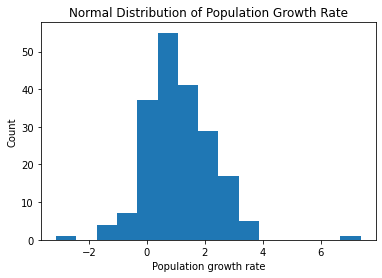

In [20]:
plt.hist(df1['Population growth rate'],bins=15)
plt.xlabel('Population growth rate')
plt.ylabel('Count')
plt.title('Normal Distribution of Population Growth Rate')
plt.show()

### From the below scatter plot,we can see that 'GDP (purchasing power parity)'  and 'Electricity - production' are positively correlated ie if one is increasing,the other one is also increasing.

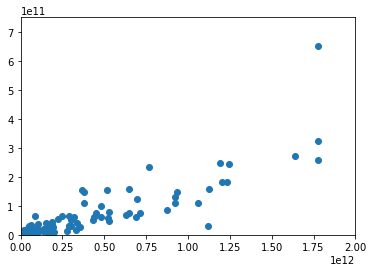

In [21]:
x=df1['GDP (purchasing power parity)']
y=df1['Electricity - production']
plt.xlim(0, 0.2*10000000000000)
plt.ylim(0, 0.75e12)
plt.scatter(x,y)

### Same thing we can say with 'Electricity - production' and 'Electricity - consumption' that they are positively correlated.

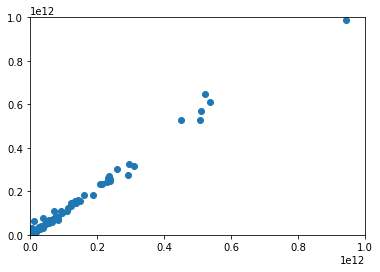

In [22]:
y=df1['Electricity - production']
x=df1['Electricity - consumption']
plt.xlim(0, 1e12)
plt.ylim(0, 1e12)
plt.scatter(x,y)

## Box-Plot

### Below we are comparing 'GDP-real growth rate' of countries which have 'republic' and 'parliamentart democracy' govt.

{'whiskers': [<matplotlib.lines.Line2D at 0x1eaa9a3cd30>,
 'caps': [<matplotlib.lines.Line2D at 0x1eaa9a4d430>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eaa9a3c9d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1eaa9a4daf0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1eaa9a4ddf0>,
 'means': []}

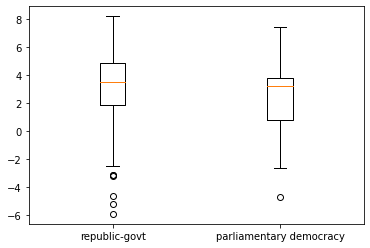

In [23]:
df1['Government Type'].value_counts()
govt=['republic','parliamentary democracy']
x=df1[df1['Government Type']=='republic']['GDP - real growth rate']
y=df1[df1['Government Type']=='parliamentary democracy']['GDP - real growth rate']
plt.boxplot([x,y],labels=['republic-govt','parliamentary democracy'])

## We can see that minimum and maximum GDP growth rate is of country with republic government. Also the median GDP is slightly more for republic govt countries.

## Pie-Chart

### Here we are analyzing the number of 'Telephone (fixed lines)' of top 5 countries in our dataset.The chart is showing that Algeria is having the highests number and Andorra has the least in number.

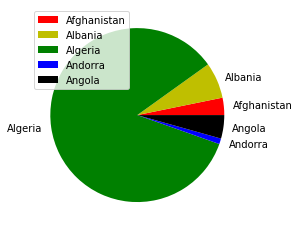

In [24]:
countries =df['Country Name'].head(5).to_list()
  
# portion covered by each label 
slices = df1['Telephones - fixed lines'].head(5).to_list()
  

colors = ['r', 'y', 'g', 'b','black'] 
  
# plotting the pie chart 
plt.pie(slices, labels = countries, colors=colors) 
  
# plotting legend 
plt.legend() 
  
# showing the plot 
plt.show() 

# Bar-Plots

## Here we are analysing 5 countries on the basis of their total exports and imports.m

## We can see that both the exports and imports are maximum for China and minimum for India.Also we got to know that the country which is exporting more is also importing more.

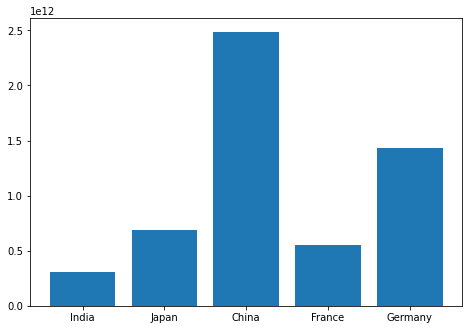

In [27]:
cont=['India','Japan','China','France','Germany']
exports=[]
for i in cont:
    x=exports.append(int(df1[df1['Country Name']==i]['Exports']))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(cont,exports)
plt.show()


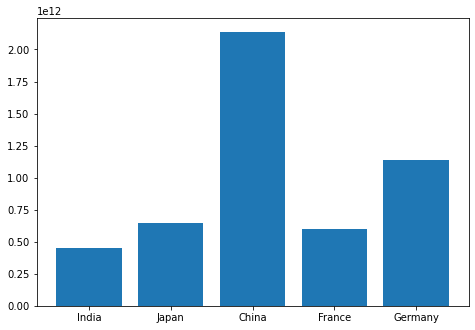

In [28]:
cont=['India','Japan','China','France','Germany']
imports=[]
for i in cont:
    x=imports.append(int(df1[df1['Country Name']==i]['Imports']))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(cont,imports)
plt.show()

## Some data analysis,modeling questions that can come to our mind after looking at the data

### Q1.Does increasing educational expenditures results in decreasing unemployment in youth of age 15-24??

### Q2.Does Inflation rate affects GDP??

### Q3-Does Industrial production growth rate affects Exports,Unemployment,Central bank discount rate??

## Pearson Spearman Tests

## Doing pairwise pearson correlation test on all numeric columns to identify the top 20 that correlate the strongest.

In [29]:
col1=[]
col2=[]
pearson=[]
spearman=[]
for pair in itertools.combinations(num_col,2):
    col1.append(pair[0])
    col2.append(pair[1])
b={'col1':col1,'col2':col2}
corr=pd.DataFrame(b)
corr['pearson']=np.nan
corr['spearman']=np.nan
corr
# Created an empty dataframe to store pearson spearman coefficients.

,col1,col2,pearson,spearman
0,GDP - per capita (PPP),GDP - real growth rate,NaN,NaN
1,GDP - per capita (PPP),Gross national saving,NaN,NaN
2,GDP - per capita (PPP),Industrial production growth rate,NaN,NaN
3,GDP - per capita (PPP),Unemployment rate,NaN,NaN
4,GDP - per capita (PPP),Distribution of family income - Gini index,NaN,NaN
...,...,...,...,...
2140,Children under the age of 5 years underweight,"Unemployment, youth ages 15-24",NaN,NaN
2141,Children under the age of 5 years underweight,Merchant marine,NaN,NaN
2142,Obesity - adult prevalence rate,"Unemployment, youth ages 15-24",NaN,NaN
2143,Obesity - adult prevalence rate,Merchant marine,NaN,NaN


## Calculating pearson and spearman correlation coefficients by using pearsonr,spearmanr function from scipy.stats module.

In [30]:
for i in range(2145):
    x = df1[corr.loc[i,'col1']]
    y = df1[corr.loc[i,'col2']]
    corr.loc[i,'pearson']=pearsonr(x,y)[0]
    corr.loc[i,'spearman']=spearmanr(x,y)[0]
corr

,col1,col2,pearson,spearman
0,GDP - per capita (PPP),GDP - real growth rate,-0.053872,-0.223751
1,GDP - per capita (PPP),Gross national saving,0.346547,0.367090
2,GDP - per capita (PPP),Industrial production growth rate,-0.046968,-0.115410
3,GDP - per capita (PPP),Unemployment rate,-0.275604,-0.235400
4,GDP - per capita (PPP),Distribution of family income - Gini index,-0.256341,-0.302100
...,...,...,...,...
2140,Children under the age of 5 years underweight,"Unemployment, youth ages 15-24",-0.238375,-0.279608
2141,Children under the age of 5 years underweight,Merchant marine,-0.037773,-0.128637
2142,Obesity - adult prevalence rate,"Unemployment, youth ages 15-24",0.217745,0.236909
2143,Obesity - adult prevalence rate,Merchant marine,-0.048786,0.135721


## Sorting and then calculating the difference of pearson and spearman coefficients

In [31]:
corr=corr.sort_values(by='pearson',ascending=False).reset_index(drop=True)

In [32]:
corr['difference']=corr.pearson-corr.spearman
corr

,col1,col2,pearson,spearman,difference
0,Stock of narrow money,Stock of broad money,0.999999,0.992260,0.007740
1,Electricity - production,Electricity - consumption,0.999426,0.978663,0.020763
2,Electricity - production,Electricity - installed generating capacity,0.998353,0.978225,0.020128
3,Electricity - consumption,Electricity - installed generating capacity,0.998317,0.973657,0.024660
4,Refined petroleum products - production,Refined petroleum products - consumption,0.989402,0.880364,0.109038
...,...,...,...,...,...
2140,Life expectancy at birth,Total fertility rate,-0.812648,-0.768647,-0.044000
2141,Median age,Total fertility rate,-0.840677,-0.941150,0.100473
2142,Birth rate,Life expectancy at birth,-0.858480,-0.819729,-0.038751
2143,Infant mortality rate,Life expectancy at birth,-0.890820,-0.909562,0.018742


## Explaining why difference is observed in spearman and pearson coefficients.
### 1.The fundamental difference between the two correlation coefficients is that the Pearson coefficient works with a linear relationship between the two variables whereas the Spearman Coefficient works with monotonic relationships as well.

### 2.  One more difference is that Pearson works with raw data values of the variables whereas Spearman works with rank-ordered variables.

## Find the top 20 pairs that correlate the strongest ie either their coefficient is close to +1 or -1 and storing in dataframe named corr1.

In [33]:
corr1=corr.iloc[:,0:3]
corr1['pearson']=corr1['pearson'].abs()
corr1=corr1.sort_values(by='pearson',ascending=False).reset_index(drop=True)
corr1=corr1[0:20]
corr1

,col1,col2,pearson
0,Stock of narrow money,Stock of broad money,0.999999
1,Electricity - production,Electricity - consumption,0.999426
2,Electricity - production,Electricity - installed generating capacity,0.998353
3,Electricity - consumption,Electricity - installed generating capacity,0.998317
4,Refined petroleum products - production,Refined petroleum products - consumption,0.989402
5,Telephones - mobile cellular,Population,0.987178
6,GDP (purchasing power parity),Electricity - production,0.986861
7,GDP (purchasing power parity),Electricity - installed generating capacity,0.986524
8,Telephones - mobile cellular,Labor force,0.986125
9,GDP (purchasing power parity),Electricity - consumption,0.984572


## Note -
### df1 is the dataframe with all columns with numeric columns not standardized.
### MS_data is the dataframe with all standardized numeric columns only.

# Regression Models


In [34]:
MS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 66 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   GDP - real growth rate                               197 non-null    float64
 1   Gross national saving                                197 non-null    float64
 2   Industrial production growth rate                    197 non-null    float64
 3   Unemployment rate                                    197 non-null    float64
 4   Distribution of family income - Gini index           197 non-null    float64
 5   Taxes and other revenues                             197 non-null    float64
 6   Budget surplus (+) or deficit (-)                    197 non-null    float64
 7   Public debt                                          197 non-null    float64
 8   Inflation rate (consumer prices)                     197 non-null    f

## First setting up Linear Regression model on all the numeric columns and checking the accuracy.

In [35]:
from sklearn.model_selection import train_test_split
sale_train_set, sale_test_set = train_test_split(MS_data,test_size=0.2,random_state=0)

#Predictors for training (X)
X_train_set=sale_train_set[features]
#Response for training (Y)
Y_train_set=sale_train_set['Y']

#Predictors for testing (X)
X_test_set=sale_test_set[features]
#Response for testing (Y)
Y_test_set=sale_test_set['Y']

In [36]:
from sklearn.linear_model import LinearRegression
lin_model= LinearRegression()
lin_model.fit(X_train_set,Y_train_set)

LinearRegression()

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lin_Y_train_predict = lin_model.predict(X_train_set)
lin_train_mse=mean_squared_error(lin_Y_train_predict,Y_train_set)
lin_train_rmse=np.sqrt(lin_train_mse)
print('Root MSE(training set) of the model:',lin_train_rmse, 'Mean of Sales:', Y_train_set.mean())
lin_train_r2=r2_score(Y_train_set, lin_Y_train_predict)
print('R2 score for training set is', lin_train_r2)

Root MSE(training set) of the model: 0.422740341375285 Mean of Sales: -0.04277593664050602
R2 score for training set is 0.8249354582771616


In [38]:
lin_Y_test_predict = lin_model.predict(X_test_set)
lin_test_mse=mean_squared_error(lin_Y_test_predict,Y_test_set)
lin_test_rmse=np.sqrt(lin_test_mse)
print('Root MSE of the model:',lin_test_rmse, 'Mean of Sales:', Y_test_set.mean())
lin_test_r2=r2_score(Y_test_set, lin_Y_test_predict)
print('R2 score for test set is', lin_test_r2)

Root MSE of the model: 2.0197105195535574 Mean of Sales: 0.16789555131398576
R2 score for test set is -3.6202087274933445


### Indeed R2-score on test dataset is really less and high on train dataset which means our model is overfitting.

# 4. Feature Engineering for the baseline model

### Setting up OLS regression model,first on all the columns and will check p-values.

In [40]:
import statsmodels.api as sm

X_train_set_OLS= X_train_set
X_test_set_OLS=X_test_set
#Actually this is only a shallow copy!
X_train_set_OLS['Intercept']=1
X_test_set_OLS['Intercept']=1
X_train_set_OLS['Intercept']=1
est_i = sm.OLS(Y_train_set,X_train_set_OLS)
est2_i = est_i.fit()
print(est2_i.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     6.597
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           3.87e-16
Time:                        09:55:38   Log-Likelihood:                -87.597
No. Observations:                 157   AIC:                             307.2
Df Residuals:                      91   BIC:                             508.9
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

# Our training set has 157 rows and 66 columns (including one intercept column) 

In [41]:
X_train_set

,GDP - real growth rate,Gross national saving,Industrial production growth rate,Unemployment rate,Distribution of family income - Gini index,Taxes and other revenues,Budget surplus (+) or deficit (-),Public debt,Inflation rate (consumer prices),Telephones - fixed lines,...,Maternal mortality rate,Infant mortality rate,Life expectancy at birth,Total fertility rate,Education expenditures,Children under the age of 5 years underweight,Obesity - adult prevalence rate,"Unemployment, youth ages 15-24",Merchant marine,Intercept
143,-0.271998,0.544627,-0.689012,-0.520745,0.315707,-0.817181,0.282038,-1.264339,-0.093846,1.462975,...,-0.606351,-0.774430,-0.160212,-0.793363,-0.472445,-0.177733,0.329675,-0.076765,1.905866,1
26,0.549657,-1.146009,1.102251,6.405513,0.091678,-0.499539,-0.472874,-0.563506,-0.136020,-0.271251,...,0.723567,1.472444,-1.412142,1.769872,-0.171242,0.558617,-1.300844,-0.787986,-0.324021,1
45,-0.012087,-0.040215,-0.036929,-0.342283,-0.086226,-0.155428,0.131056,-0.172776,-0.110460,-0.252462,...,-0.426395,-0.399951,0.235134,-0.420234,-0.111002,-0.177733,0.092085,-0.217138,-0.324021,1
144,0.499352,-0.831472,0.128056,-0.761910,1.528095,-0.492922,-0.054769,-0.489081,-0.079788,-0.274800,...,0.407546,0.274111,-1.056331,0.942499,-0.833888,-0.251368,-1.282210,0.512799,-0.324021,1
61,0.247824,-1.391741,-0.657586,-0.342283,1.501739,-0.559097,0.142670,0.983908,-0.038891,-0.273371,...,1.939366,1.645641,-0.937727,0.674819,-1.436293,0.595435,-0.862933,-0.376227,-0.404385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.331667,-0.910106,1.039400,1.292816,-0.086226,-0.195133,0.816284,0.438127,-0.129630,-0.273676,...,-0.571238,-0.648044,0.301025,-0.477014,-0.773647,-0.177733,0.161964,-0.217138,-0.407035,1
192,0.616731,0.790359,0.725143,-0.810143,-0.527694,-0.261308,-0.333506,0.069104,-0.096402,-0.023220,...,-0.492233,-0.306331,0.182421,-0.647356,0.732366,0.300895,-1.626948,-0.919000,1.232926,1
117,0.331667,0.583944,-0.689012,-0.250640,-0.633119,-0.142193,-0.298664,1.089344,-0.082344,-0.259179,...,-0.483455,-0.128454,-0.305173,-0.444568,-0.231483,-1.319077,0.096743,0.072965,-0.178306,1
47,0.599963,0.131797,-0.107637,2.836271,0.276172,0.433532,-0.600628,-0.758871,-0.132186,-0.273448,...,0.407546,0.985621,-1.122222,-0.258003,0.009479,2.239951,-0.564781,-0.217138,-0.399087,1


In [42]:
X_train_set_new=X_train_set.iloc[:,0:65]

## Applying backward elimination using OLS regression and removing features with maximum p-values each time. 

In [43]:
list=[]
for i in range(0,65) :
    list.append(i)

# We can see in the OLS summary that final remained columns have p-values close to zero.

In [44]:
x_opt = X_train_set_new.iloc[:, list] 
regressorOLS = sm.OLS(endog=Y_train_set, exog=x_opt).fit()
pval=[]
while True :
  pval=[]
  for x in regressorOLS.pvalues:
    pval.append(x)
  maximum=max(pval)
  if maximum> 0.05: 
       list.pop(pval.index(maximum))
       x = np.append(arr = np.ones((157, 1)).astype(int),  
              values = X_train_set,axis=1) 
       x_opt = X_train_set_new.iloc[:, list] 
       x_opt = np.array(x_opt, dtype=float)
       regressorOLS = sm.OLS(endog = Y_train_set, exog = x_opt).fit()

  else:
       break
print(list)
regressorOLS.summary()

[1, 4, 7, 8, 14, 23, 31, 32, 33, 35, 40, 43, 44, 46, 50, 51, 52, 54, 55, 56, 60]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.778
Model:                            OLS   Adj. R-squared (uncentered):              0.744
Method:                 Least Squares   F-statistic:                              22.69
Date:                Sat, 19 Dec 2020   Prob (F-statistic):                    1.56e-34
Time:                        09:57:06   Log-Likelihood:                         -106.39
No. Observations:                 157   AIC:                                      254.8
Df Residuals:                     136   BIC:                                      319.0
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1683      0.050      3.392      0.001       0.070       0.266
x2             0.1070      0.051      2.092      0.038       0.006       0.208
x3            -0.0973      0.046     -2.138      0.034      -0.187      -0.007
x4            -0.1774      0.046     -3.823      0.000      -0.269      -0.086
x5            -3.6638      0.892     -4.106      0.000      -5.429      -1.899
x6             0.6103      0.126      4.832      0.000       0.361       0.860
x7            -1.9009      0.415     -4.577      0.000      -2.722      -1.080
x8             1.2202      0.245      4.978      0.000       0.735       1.705
x9            -1.3418      0.296     -4.537      0.000      -1.927      -0.757
x10            2.2474      0.492      4.567      0.000       1.274       3.220
x11           -1.1517      0.228     -5.059      0.000      -1.602      -0.701
x12            0.5065      0.089      5.700      0.000       0.331       0.682
x13            1.4075      0.363      3.882      0.000       0.690       2.125
x14            2.7030      0.676      3.997      0.000       1.366       4.040
x15           -0.1258      0.057     -2.225      0.028      -0.238      -0.014
x16            1.7848      0.169     10.563      0.000       1.451       2.119
x17            1.2045      0.192      6.279      0.000       0.825       1.584
x18           -0.2042      0.059     -3.475      0.001      -0.320      -0.088
x19           -0.7114      0.134     -5.299      0.000      -0.977      -0.446
x20            0.1703      0.081      2.093      0.038       0.009       0.331
x21           -0.1104      0.044     -2.508      0.013      -0.197      -0.023
==============================================================================
Omnibus:                      106.623   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1230.293
Skew:                           2.238   Prob(JB):                    7.00e-268
Kurtosis:                      15.963   Cond. No.                         78.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
y_pred=regressorOLS.predict(X_test)
r2_score(y_test,y_pred)

0.46603463578506377

## From the final Ols summary,our training R-square accuracy is coming 0.78 but test accuracy is still low .The finally selected 21 features are given below.

In [45]:
final=[]
for i in ([1, 4, 7, 8, 14, 23, 31, 32, 33, 35, 40, 43, 44, 46, 50, 51, 52, 54, 55, 56, 60]):
   final.append(features[i])
final

['Gross national saving',
 'Distribution of family income - Gini index',
 'Public debt',
 'Inflation rate (consumer prices)',
 'Labor force',
 'Debt - external',
 'Crude oil - production',
 'Crude oil - exports',
 'Crude oil - imports',
 'Refined petroleum products - production',
 'Natural gas - consumption',
 'Natural gas - proved reserves',
 'Carbon dioxide emissions from consumption of energy',
 'Population',
 'Military expenditures',
 'Median age',
 'Population growth rate',
 'Death rate',
 'Net migration rate',
 'Maternal mortality rate',
 'Education expenditures']

# ElasticNet Regression-It automatically change the coefficient of unwanted features to 0 as we can see in the result given below.

In [46]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train_set, Y_train_set)
elastic_net.intercept_,elastic_net.coef_

(-0.0384938182298135,
 array([ 0.        ,  0.07572031, -0.        , -0.0407621 , -0.        ,
         0.        ,  0.        , -0.01596092, -0.        , -0.        ,
        -0.03398978, -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        ,  0.        ,
         0.        , -0.        ,  0.        ,  0.09113333,  0.        ,
         0.        , -0.        , -0.        , -0.        ,  0.        ,
        -0.        ,  0.        ,  0.05978144, -0.        ,  0.        ,
        -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        -0.        ,  0.12818479, -0.        ,  0.        , -0.        ,
        -0.07337229, -0.        , -0.        , -0.        , -0.        ,
        -0.        ,  0.33287699,  0.01172809,  0.        , -0.        ,
         0.13273561,  0.        ,  0.        ,  0.22789073,  0.00436192,
        -0.07358481,  0.        ,  0.        , -0.04466612, -0.        ,
         0.        ]))

## Using elastic net technique on training dataset and calculating accuracy which is coming to be 57%

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
elastic_net_Y_train_predict = elastic_net.predict(X_train_set)
elastic_net_train_mse=mean_squared_error(elastic_net_Y_train_predict,Y_train_set)
elastic_net_train_rmse=np.sqrt(elastic_net_train_mse)
print('Root MSE of the model:',elastic_net_train_rmse, 'Mean of Sales:', Y_train_set.mean())
elastic_net_train_r2=r2_score(Y_train_set, elastic_net_Y_train_predict)
print('R2 score for training data is', elastic_net_train_r2)

Root MSE of the model: 0.6584907439072322 Mean of Sales: -0.04277593664050602
R2 score for training data is 0.5752336026513328


## Using elastic net technique on test dataset and calculating accuracy which is coming to be 63%

In [50]:
elastic_net_Y_test_predict = elastic_net.predict(X_test_set)
elastic_net_test_mse=mean_squared_error(elastic_net_Y_test_predict,Y_test_set)
elastic_net_test_rmse=np.sqrt(elastic_net_test_mse)
print('Root MSE of the model:',elastic_net_test_rmse, 'Mean of Sales:', Y_test_set.mean())
elastic_net_test_r2=r2_score(Y_test_set, elastic_net_Y_test_predict)
print('R2 score is', elastic_net_test_r2)

Root MSE of the model: 0.572167858795716 Mean of Sales: 0.16789555131398576
R2 score is 0.6292080840747115


# 5. Model fitting and selection


### Trying some different machine learning regression techniques like Ridge and Lasso Regressions too.

In [59]:
MS_data

,GDP - real growth rate,Gross national saving,Industrial production growth rate,Unemployment rate,Distribution of family income - Gini index,Taxes and other revenues,Budget surplus (+) or deficit (-),Public debt,Inflation rate (consumer prices),Telephones - fixed lines,...,Maternal mortality rate,Infant mortality rate,Life expectancy at birth,Total fertility rate,Education expenditures,Children under the age of 5 years underweight,Obesity - adult prevalence rate,"Unemployment, youth ages 15-24",Merchant marine,Y
0,-0.070777,0.171114,-0.830427,1.283169,-1.239313,-1.161292,-1.309085,-1.527927,-0.077232,-0.268867,...,2.119322,3.990816,-2.690429,1.972660,-0.231483,1.638598,-1.310161,0.044891,-0.324021,-0.808771
1,0.113677,-0.497277,0.536589,0.308863,-1.292026,-0.076018,0.212354,0.481541,-0.115572,-0.261719,...,-0.615130,-0.545062,0.801797,-0.866366,-0.291723,-1.245442,0.199233,1.383108,-0.359346,-0.360783
2,-0.288767,1.655335,-0.437606,0.106284,-0.461803,0.235006,-0.670313,-0.892216,-0.069563,-0.101027,...,-0.189380,-0.203350,0.617302,0.058345,-0.111002,-1.061354,0.730316,0.802902,-0.318722,-0.245587
3,-0.707979,-0.040215,-0.036929,-0.665444,-0.086226,2.663639,-0.356734,-0.473576,-0.152634,-0.273346,...,-0.426395,-0.919541,1.368460,-0.955593,-0.773647,-0.177733,0.562606,-0.217138,-0.324021,1.234907
4,-0.942737,0.751042,-0.139063,-0.385693,0.513379,0.036480,-0.333506,0.270671,0.239713,-0.266509,...,0.376822,1.992034,-1.570281,2.840591,-0.653166,0.902247,-1.058596,2.084970,-0.363762,-0.603977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0.616731,0.790359,0.725143,-0.810143,-0.527694,-0.261308,-0.333506,0.069104,-0.096402,-0.023220,...,-0.492233,-0.306331,0.182421,-0.647356,0.732366,0.300895,-1.626948,-0.919000,1.232926,-0.599710
193,-0.012087,-0.040215,-0.036929,-0.342283,-0.086226,-0.155428,0.131056,-0.172776,-0.110460,-0.252462,...,-0.426395,1.275843,-1.148578,0.974945,-0.111002,-0.177733,0.092085,-0.217138,-0.324021,-0.787439
194,-1.512866,-2.246888,0.866559,1.582214,-0.119172,-1.306878,-0.159295,0.565269,0.174535,-0.210508,...,0.038856,0.999664,-0.832301,0.723488,-0.111002,3.467202,-0.229360,0.690604,-0.384957,-0.787439
195,0.046603,1.704482,0.206620,0.424622,2.463743,-0.751005,-0.403190,0.211752,-0.056783,-0.269833,...,0.253926,1.687770,-2.571825,2.426904,-0.111002,0.399075,-1.067913,0.643813,-0.411450,-0.723440


In [61]:
final
X=MS_data[final]
y=MS_data["Y"]

In [62]:
y

0     -0.808771
1     -0.360783
2     -0.245587
3      1.234907
4     -0.603977
         ...   
192   -0.599710
193   -0.787439
194   -0.787439
195   -0.723440
196   -0.795972
Name: Y, Length: 197, dtype: float64

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

from sklearn.linear_model import LinearRegression
# Train model
lr = LinearRegression().fit(X_train, y_train)
# get cross val scores
get_cv_scores(lr)

CV Mean:  0.0953814384441966
STD:  0.7302409524750576




In [83]:
from sklearn.linear_model import Ridge
# Train model with default alpha=1
ridge = Ridge(alpha=1).fit(X_train, y_train)
# get cross val scores
get_cv_scores(ridge)

CV Mean:  0.3948821763133294
STD:  0.15894703437875554




In [66]:
from sklearn.model_selection import GridSearchCV
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Score:  0.4746349223078331
Best Params:  {'alpha': 10}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    5.1s finished


In [80]:
grid_result.predict(X_test)

array([ 0.06750091,  0.4404506 ,  0.26752357, -0.79992722,  3.51077928,
       -0.27545535,  1.12484565, -0.31971269,  0.63822818, -0.52316385,
       -0.39230418, -0.23436564,  0.07381517,  2.13895654,  1.05865191,
       -0.74110812,  1.08259991,  0.93994924,  0.11401907,  0.93942497,
        0.38291386, -0.90288074,  0.66855762,  0.72525855,  1.53980447,
       -0.48695854, -0.18848011,  0.26953391, -1.05287376,  0.52929293,
       -0.11792637,  1.81487742, -1.02197076,  0.04368979,  0.43850797,
        0.45111544, -0.02174552,  0.05002492,  0.76856473,  0.30207639,
        1.80420717, -0.51707523,  0.31679779, -1.09258863, -0.91153882,
        4.58221564,  0.36830765,  0.31178727, -0.09708304,  0.49126917])

In [81]:
r2_score(y_test,grid_result.predict(X_test))

0.0938450370957874

In [69]:
from sklearn.linear_model import Lasso
# find optimal alpha with grid search
lasso = Lasso(alpha=1).fit(X_train, y_train)
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Score:  0.4521705299063269
Best Params:  {'alpha': 0.01}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.1s finished


In [85]:
y_pred=grid_result.predict(X_test)
r2_score(y_test,y_pred)

0.0938450370957874

## We can see that both ridge and lasso regressions are performing bad.

# Trying an alternate method to predict GDP per capita i.e by predicting GDP purchase power parity as 
## GDP per capita = GDP purchase power parity / Population

In [87]:
MS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 66 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   GDP - real growth rate                               197 non-null    float64
 1   Gross national saving                                197 non-null    float64
 2   Industrial production growth rate                    197 non-null    float64
 3   Unemployment rate                                    197 non-null    float64
 4   Distribution of family income - Gini index           197 non-null    float64
 5   Taxes and other revenues                             197 non-null    float64
 6   Budget surplus (+) or deficit (-)                    197 non-null    float64
 7   Public debt                                          197 non-null    float64
 8   Inflation rate (consumer prices)                     197 non-null    f

In [88]:
MS_data.head()

,GDP - real growth rate,Gross national saving,Industrial production growth rate,Unemployment rate,Distribution of family income - Gini index,Taxes and other revenues,Budget surplus (+) or deficit (-),Public debt,Inflation rate (consumer prices),Telephones - fixed lines,...,Maternal mortality rate,Infant mortality rate,Life expectancy at birth,Total fertility rate,Education expenditures,Children under the age of 5 years underweight,Obesity - adult prevalence rate,"Unemployment, youth ages 15-24",Merchant marine,Y
0,-0.070777,0.171114,-0.830427,1.283169,-1.239313,-1.161292,-1.309085,-1.527927,-0.077232,-0.268867,...,2.119322,3.990816,-2.690429,1.972660,-0.231483,1.638598,-1.310161,0.044891,-0.324021,-0.808771
1,0.113677,-0.497277,0.536589,0.308863,-1.292026,-0.076018,0.212354,0.481541,-0.115572,-0.261719,...,-0.615130,-0.545062,0.801797,-0.866366,-0.291723,-1.245442,0.199233,1.383108,-0.359346,-0.360783
2,-0.288767,1.655335,-0.437606,0.106284,-0.461803,0.235006,-0.670313,-0.892216,-0.069563,-0.101027,...,-0.189380,-0.203350,0.617302,0.058345,-0.111002,-1.061354,0.730316,0.802902,-0.318722,-0.245587
3,-0.707979,-0.040215,-0.036929,-0.665444,-0.086226,2.663639,-0.356734,-0.473576,-0.152634,-0.273346,...,-0.426395,-0.919541,1.368460,-0.955593,-0.773647,-0.177733,0.562606,-0.217138,-0.324021,1.234907
4,-0.942737,0.751042,-0.139063,-0.385693,0.513379,0.036480,-0.333506,0.270671,0.239713,-0.266509,...,0.376822,1.992034,-1.570281,2.840591,-0.653166,0.902247,-1.058596,2.084970,-0.363762,-0.603977


In [94]:
MS_data.describe()

,GDP - real growth rate,Gross national saving,Industrial production growth rate,Unemployment rate,Distribution of family income - Gini index,Taxes and other revenues,Budget surplus (+) or deficit (-),Public debt,Inflation rate (consumer prices),Telephones - fixed lines,...,Maternal mortality rate,Infant mortality rate,Life expectancy at birth,Total fertility rate,Education expenditures,Children under the age of 5 years underweight,Obesity - adult prevalence rate,"Unemployment, youth ages 15-24",Merchant marine,Y
count,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,...,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02
mean,4.099935e-17,-2.693841e-16,3.916777e-17,-1.641383e-17,3.809699e-16,7.918088e-17,4.226737e-17,9.073396e-17,2.220446e-16,3.409568e-17,...,-3.381390e-17,-1.296199e-16,-5.263697e-16,-2.716383e-16,-1.104587e-16,3.240499e-17,-2.065466e-16,1.740711e-16,1.380734e-17,-5.692006e-17
std,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,...,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00
min,-6.644020e+00,-4.212744e+00,-4.632932e+00,-9.934283e-01,-2.056358e+00,-1.763487e+00,-8.347191e+00,-1.658170e+00,-1.526336e-01,-2.754869e-01,...,-6.721888e-01,-1.013161e+00,-2.690429e+00,-1.417948e+00,-2.098939e+00,-1.368167e+00,-1.626948e+00,-1.555355e+00,-4.114505e-01,-8.642365e-01
25%,-2.216929e-01,-5.562523e-01,-3.433293e-01,-5.979177e-01,-6.331191e-01,-7.179179e-01,-1.592951e-01,-6.131227e-01,-1.270736e-01,-2.718657e-01,...,-6.063513e-01,-7.276204e-01,-7.005190e-01,-6.879131e-01,-5.326852e-01,-5.704536e-01,-9.281541e-01,-6.569714e-01,-3.752424e-01,-7.234403e-01
50%,-1.208692e-02,-4.021522e-02,-3.692914e-02,-3.422829e-01,-8.622648e-02,-1.554279e-01,1.310559e-01,-1.727762e-01,-1.104595e-01,-2.524622e-01,...,-4.263954e-01,-3.999512e-01,2.351341e-01,-4.202335e-01,-1.110016e-01,-1.777333e-01,9.208469e-02,-2.171378e-01,-3.240212e-01,-3.501171e-01
75%,2.813615e-01,4.758219e-01,3.166096e-01,1.255772e-01,4.474880e-01,5.327950e-01,3.517226e-01,4.350259e-01,-7.339750e-02,-1.235391e-01,...,1.222506e-01,5.128415e-01,6.568369e-01,3.260248e-01,4.311631e-01,1.904419e-01,5.067023e-01,4.847242e-01,-1.359159e-01,3.559971e-01
max,1.020830e+01,2.874166e+00,8.942954e+00,6.405513e+00,3.214896e+00,5.158447e+00,3.417828e+00,5.623051e+00,1.375713e+01,1.052408e+01,...,4.366576e+00,3.990816e+00,2.225044e+00,3.051490e+00,5.009443e+00,3.467202e+00,3.860912e+00,3.395112e+00,7.582585e+00,5.040670e+00


#### Our dataframe MS_data is already scaled

In [96]:
X = MS_data.drop(['Y', 'GDP (purchasing power parity)', 'Population'], axis=1)
y = MS_data['GDP (purchasing power parity)']# division is for rescaling the extremely high values(significantly improves the model)


### Predicting GDP purchase power parity by simple linear regression and our test case accuracy is coming to be 84% which is much greater than the previous models we used.

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
lin_model= LinearRegression()
lin_model.fit(X_train,y_train)
lin_y_train_predict = lin_model.predict(X_train)

# lin_train_mse=mean_squared_error(lin_y_train_predict,y_train)
# lin_train_rmse=np.sqrt(lin_train_mse)
# print('Root MSE of the model:',lin_train_rmse, 'Mean of Sales:', y_train.mean())

lin_train_r2=r2_score(y_train, lin_y_train_predict)
print('R2 score(train) is', lin_train_r2)

lin_y_test_predict = lin_model.predict(X_test)

# lin_test_mse=mean_squared_error(lin_Y_test_predict,y_test)
# lin_test_rmse=np.sqrt(lin_test_mse)
# print('Root MSE of the model:',lin_test_rmse, 'Mean of Sales:', y_test.mean())


lin_test_r2=r2_score(y_test, lin_y_test_predict)
print('R2 score(test) is', lin_test_r2)

R2 score(train) is 0.9998045838726622
R2 score(test) is 0.8390747249239846


In [102]:
lin_model.score(X_test, y_test)

0.8390747249239846

## Ridge Regrsesion

In [103]:
from sklearn.linear_model import Ridge
# Train model with default alpha=1
ridge = Ridge(alpha=1).fit(X_train, y_train)
# get cross val scores
get_cv_scores(ridge)

CV Mean:  0.9429919428276501
STD:  0.024075457383440853




In [104]:
from sklearn.model_selection import GridSearchCV
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Score:  0.9429919428276463
Best Params:  {'alpha': 1}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    4.8s finished


In [105]:
r2_score(y_test,grid_result.predict(X_test))

0.8920621743775894

### Test case accuracy has improved and is coming to be 89%.

## Lasso Regression

In [106]:
from sklearn.linear_model import Lasso
# find optimal alpha with grid search
lasso = Lasso(alpha=1).fit(X_train, y_train)
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Score:  0.9104692349853931
Best Params:  {'alpha': 0.001}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.3s finished
C:\Users\tanis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.040654068380145764, tolerance: 0.01884883869970765
  model = cd_fast.enet_coordinate_descent(


In [107]:
r2_score(y_test,grid_result.predict(X_test))

0.9417322042919852

## Test ccase accuracy has even improved to 94% which is great in itself.Hence finalizing this as our final model.

# 6. Using Euclidean distance method to find similarity between different countries.

In [51]:
countryDF=pd.DataFrame()
countryDF['Country Name']=df['Country Name'].to_list()
countryDF['Most Similar Country']=['NULL' for i in range(0,197)]
countryDF['Most Different Country']=['NULL' for i in range(0,197)]

import scipy.spatial.distance as dist
for i in range(197):
    first=MS_data.iloc[i:i+1,:]
    second=MS_data.drop(i)
    dist_arr=dist.cdist(second,first,metric='euclidean')
    diff=second[dist_arr==dist_arr.max()].index.values[0]
    countryDF['Most Different Country'][i]=df['Country Name'][diff]
    sim=second[dist_arr==dist_arr.min()].index.values[0]
    countryDF['Most Similar Country'][i]=df['Country Name'][sim]
countryDF

,Country Name,Most Similar Country,Most Different Country
0,Afghanistan,Somalia,United States
1,Albania,Saint Lucia,United States
2,Algeria,Azerbaijan,China
3,Andorra,San Marino,China
4,Angola,Uganda,United States
...,...,...,...
192,Vietnam,Philippines,United States
193,Western Sahara,Tajikistan,United States
194,Yemen,Sudan,China
195,Zambia,Uganda,United States


### One interesting observation is that Vietnam is most similar to Phillippines which is true also because since the cold war, both nations have cooperated in the fields of education, tourism, agriculture, aquaculture, trade, and defense and have a strong relations between them.The Philippines was initially aligned with South Vietnam and provided them humanitarian aid in the Vietnam War.

# 7. Conclusion

### Final test accuracy for GDP purchase power parity is coming to be 94 % and thus GDP per capita can be predicted from it by dividing by population 